In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
dataFrame = pd.read_csv(r'C:\Users\Peiran Quan\Desktop\secperpickVSpicks.csv')

In [3]:
dataFrame

,Week/Recipe,Sec per Pick (pure production),Picks
0,2020-07 B2,6.294643,4
1,2020-09 H2,5.805081,5
2,2020-11 C2,6.368316,5
3,2020-11 M4,5.772031,5
4,2020-07 B4,5.345696,6
...,...,...,...
113,2020-11 G4,4.523529,17
114,2020-08 I4,3.000594,18
115,2020-09 J4,3.191643,20
116,2020-10 J4,4.137465,20


In [4]:
sec_per_pick = dataFrame['Sec per Pick (pure production)']
picks = dataFrame['Picks']

In [6]:
sec_per_pick, picks

(0      6.294643
 1      5.805081
 2      6.368316
 3      5.772031
 4      5.345696
          ...   
 113    4.523529
 114    3.000594
 115    3.191643
 116    4.137465
 117    3.334966
 Name: Sec per Pick (pure production), Length: 118, dtype: float64, 0       4
 1       5
 2       5
 3       5
 4       6
        ..
 113    17
 114    18
 115    20
 116    20
 117    25
 Name: Picks, Length: 118, dtype: int64)

In [7]:
slope, intercept, r_value, p_value, std_err = stats.linregress(picks, sec_per_pick)
print("slope: %f    intercept: %f r-value: %f " % (slope, intercept, r_value))

slope: -0.142460    intercept: 5.590953 r-value: -0.623106 


In [8]:
print("R-squared: %f p-value: %f" % (r_value**2, p_value) )

R-squared: 0.388261 p-value: 0.000000


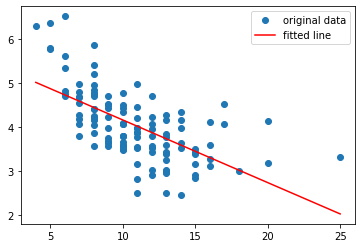

In [10]:
plt.plot(picks, sec_per_pick, 'o', label='original data')
plt.plot(picks, intercept + slope*picks, 'r', label='fitted line')
plt.legend()
plt.show()